# Latar Belakang
TransJakarta adalah sistem transportasi umum berbasis bus rapid transit (BRT) di Jakarta, Indonesia. Meskipun telah memberikan kontribusi yang signifikan dalam mengatasi masalah kemacetan dan mobilitas di ibu kota, namun masih ada beberapa kekurangan yang perlu diperhatikan seperti keramaian dan kekurangan armada Bis.

Jakarta mempunyai lebih dari 10 juta penduduk dan Transjakarta mengalami 30000 penduduk per hari. Tujuan analisis ini untuk menentukan route, hari dan Corridor yang paling sibuk


# Rumusan Masalah
Walaupun Transjakarta telah membantu penduduk Jakarta untuk melewwati kemacetan, Transjakarta masih mempunyai kekurangan
yang harus di atasi seperti kepadetan dan keramaian dan ketidaknyamanan di dalam corridor, kepadetan di bis dan wait-times untuk bis yang tinggi.
Dalam penelitian ini, saya harap untuk mencari solusi kepada masalah ini dengan analysis saya yang menjawab:

* Jam mana yang paling padat di TransJakarta pada Hari Libur

* Jam mana yang paling padat di TransJakarta pada Hari Kerja

* Corridor yang paling padat di Tranjakarta pada Hari Libur

* Corridor yang paling padat di Tranjakarta pada Hari Libur

* Tanggal-tanggal mana yang paling padat di dalam satu bulan


# Tujuan

Tujuan Exploratory Data Analysis ini adalah untuk mencari Route, Waktu, dan corridor yang paling ramai untuk melihat tingkat kepadetan dan untuk memberi saran untuk meningkatkan armada bus pada jam dan titik tertentu



# Import Tools



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', None)
import math as math
import missingno as msnoimport 
import folium
import geocoder
from geopy.geocoders import Nominatim
from geopy.distance import geodesic




In [3]:
df=pd.read_csv('Transjakarta.csv')

In [4]:
df.sample(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
25986,MTYX085I2Y98EB,3537573241596842,dki,Diana Purwanti,F,1985,JAK.10,Tanah Abang - Kota,1.0,B02702P,...,106.82750,30,2023-04-20 20:53:26,B03483P,Sbr. Dinas Kesehatan DKI Jakarta,-6.171269,106.81508,34.0,2023-04-20 21:56:30,0.0
13424,LJXD934L1C68PX,4380073493099534,dki,Karma Sihotang,M,1978,JAK.43C,Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang,1.0,B06706P,...,106.85845,0,2023-04-04 06:33:40,B06268P,Rusun Harum Tebet,-6.235196,106.85195,4.0,2023-04-04 07:59:13,0.0
31267,KOWC571P3D63KI,502057680857,flazz,Daru Budiyanto,M,1984,JAK.06,Kampung Rambutan - Pondok Gede,1.0,B01532P,...,106.90856,36,2023-04-28 09:38:35,B01594P,Jln. SPG 7,-6.286157,106.90490,47.0,2023-04-28 10:48:39,0.0
22931,YDUY439S7G99OZ,5598626771361457,dki,Karsana Budiman,F,1985,3A,Rusun Pesakih - Kalideres,1.0,B01798P,...,106.70544,0,2023-04-17 19:13:04,B02760P,Pertamina Kalideres Daan Mogot,-6.155710,106.70927,2.0,2023-04-17 20:09:29,0.0
17381,KMNA421U6E97JC,180083201664057,emoney,R.A. Wirda Safitri,F,1989,JAK.64,Lenteng Agung - Aseli,1.0,B04061P,...,106.80161,33,2023-04-10 08:30:19,B00868P,Jln. Aselih,-6.347277,106.79695,37.0,2023-04-10 09:18:01,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [6]:
df.isna().sum()/len(df)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

 Stastic deskriptif ini menunjukan bahwa NaN di dalam dataset insignifikan dan bisa diabakan

In [7]:
import missingno as msno

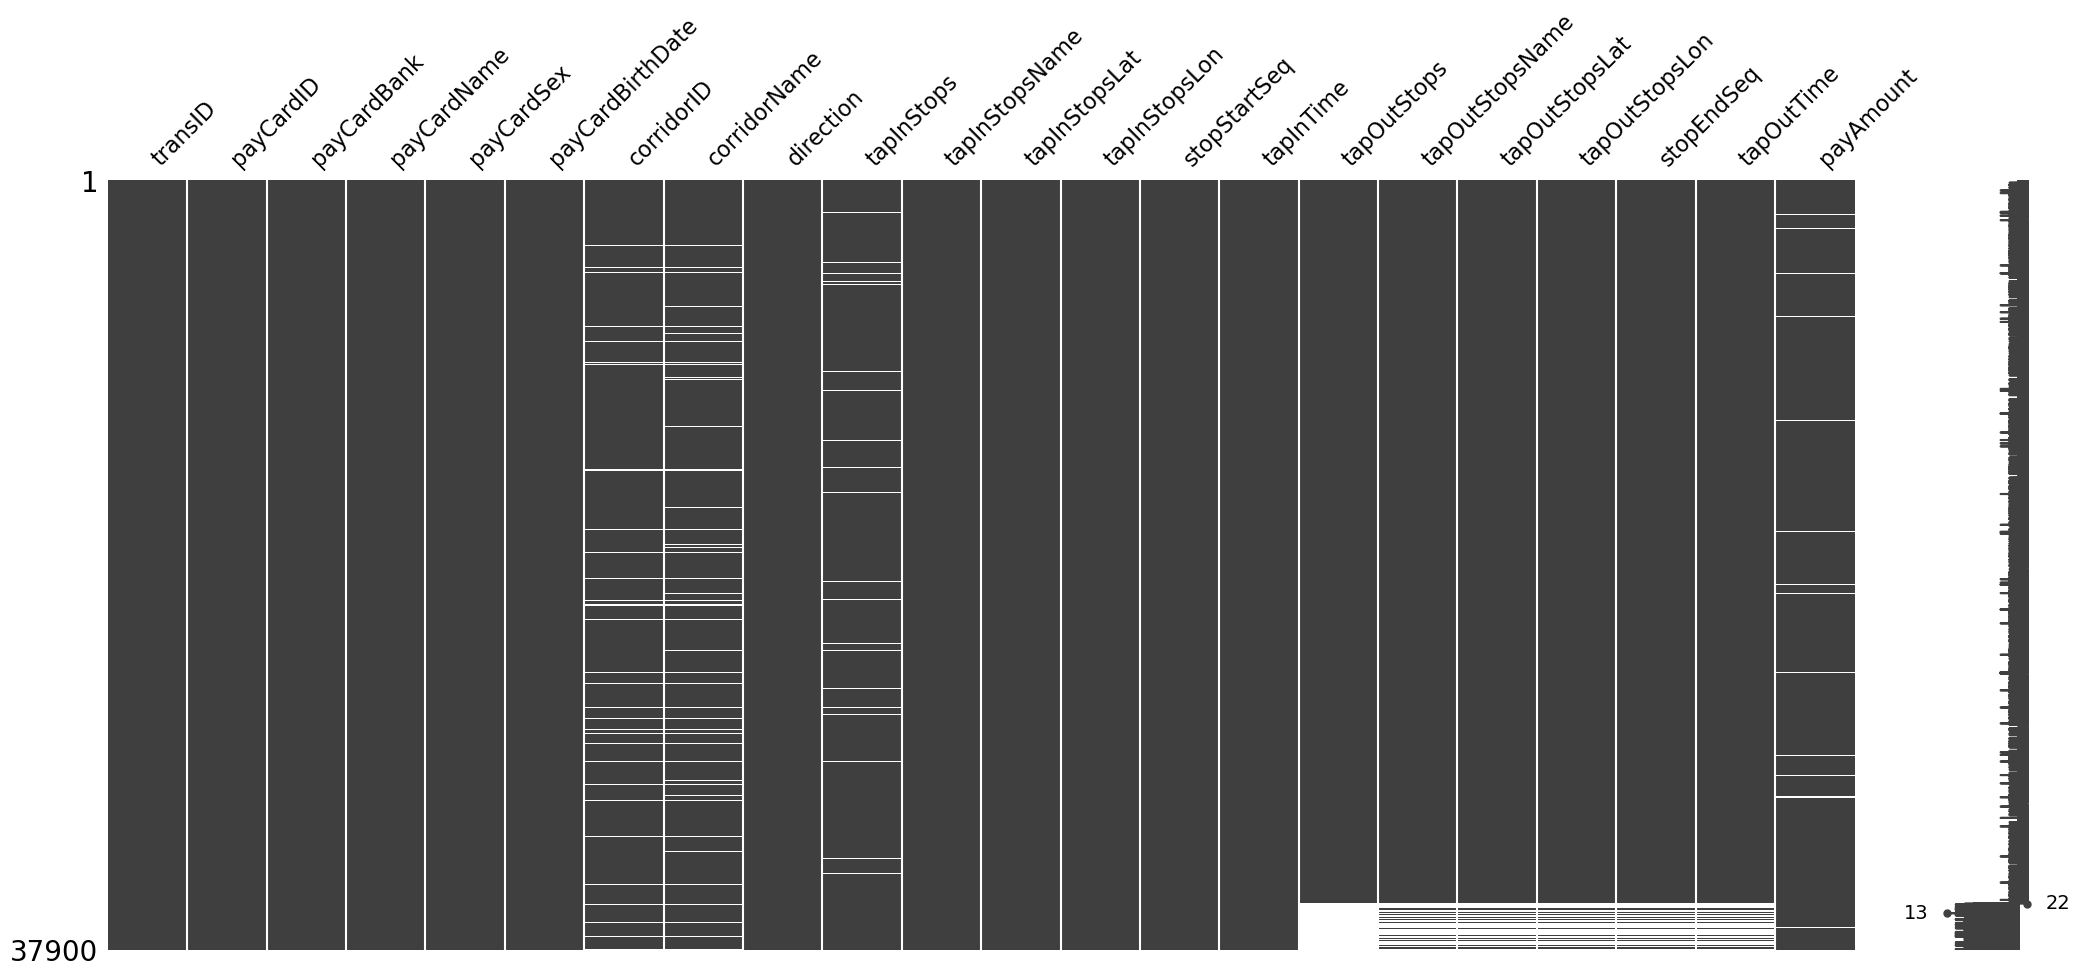

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [8]:
msno.matrix(df.sort_values('tapOutStops'))
plt.show()
df.isna().sum()/df.shape[0]*100

In [9]:
#Menghapus entry yang mempunyai NaN
df.dropna(inplace=True)


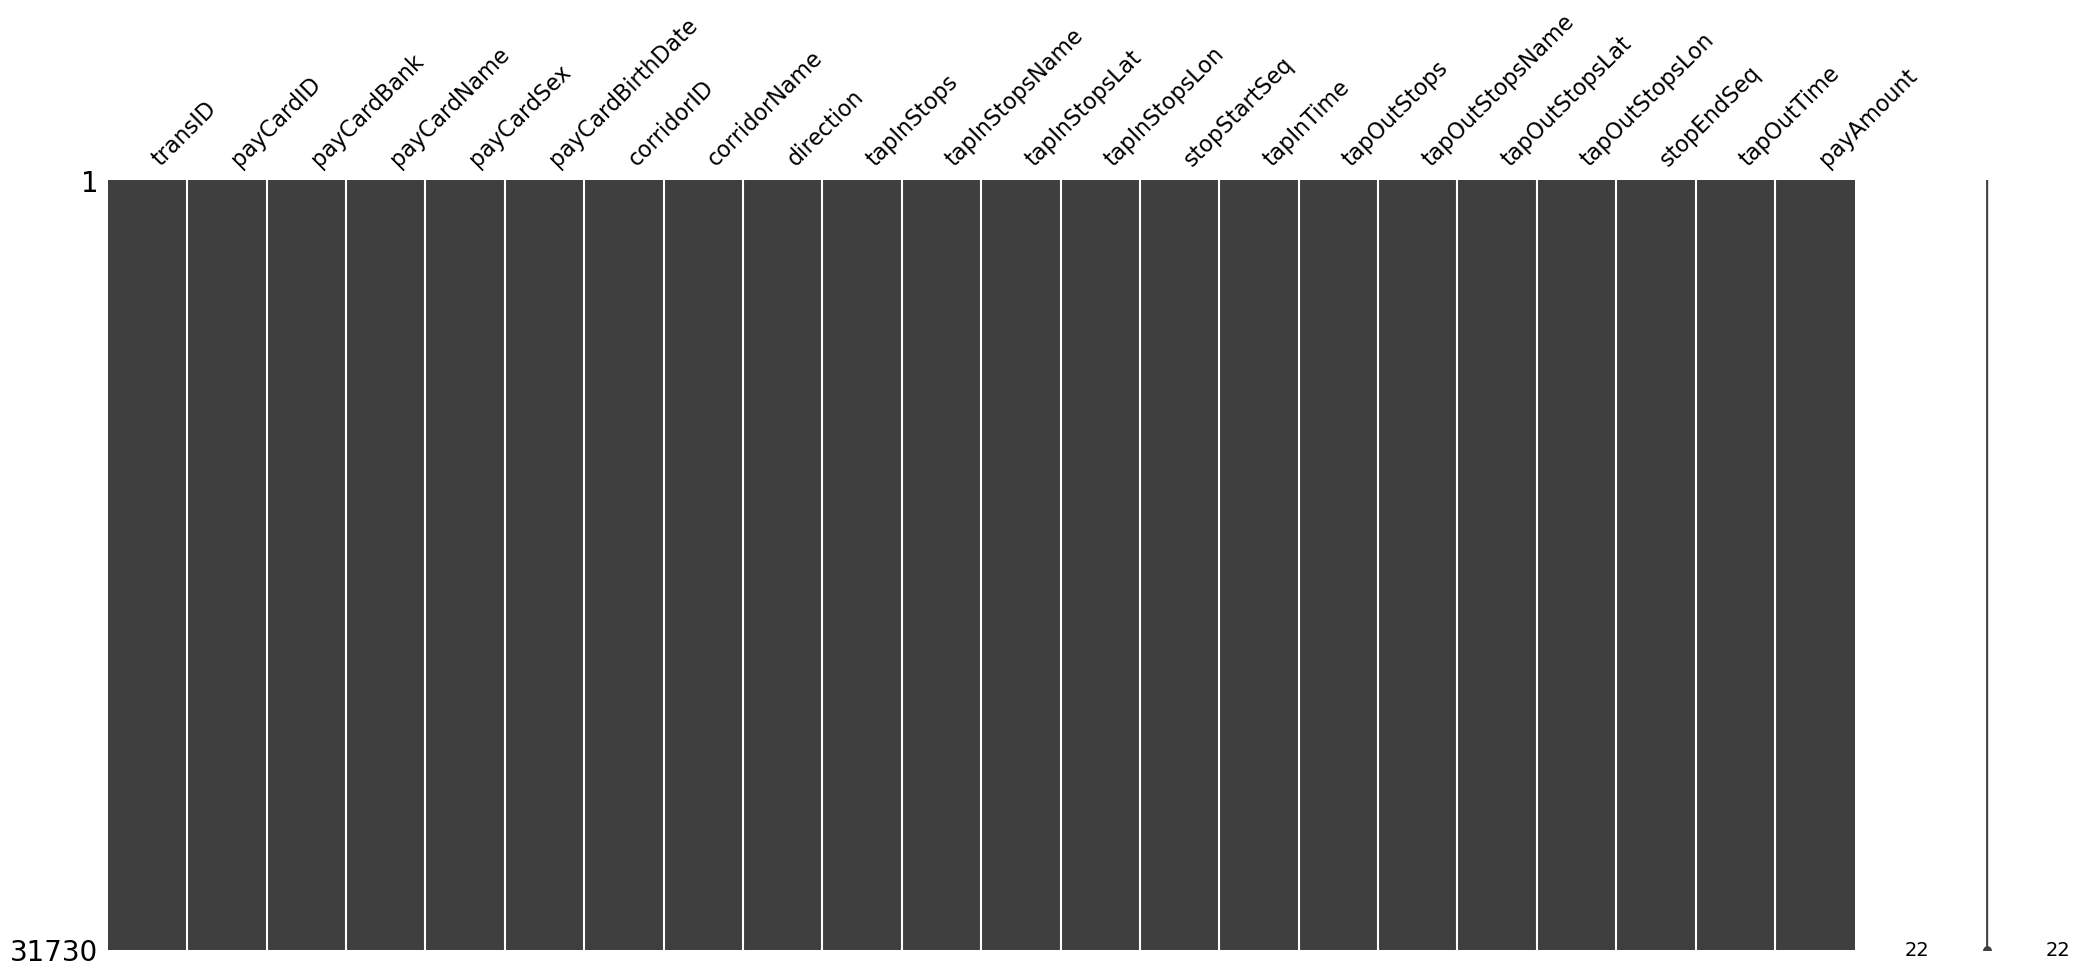

transID             0.0
payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStops          0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
stopStartSeq        0.0
tapInTime           0.0
tapOutStops         0.0
tapOutStopsName     0.0
tapOutStopsLat      0.0
tapOutStopsLon      0.0
stopEndSeq          0.0
tapOutTime          0.0
payAmount           0.0
dtype: float64

In [10]:
msno.matrix(df.sort_values('tapOutStops'))
plt.show()
df.isna().sum()/df.shape[0]*100

In [11]:
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


In [12]:
column_labels = df.columns

# Print the column labels to check for the correct column names
print(column_labels)



Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')


In [13]:
duplicate_rows = df[df.duplicated(subset=['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq'])]

# Print the rows containing duplicates
print(duplicate_rows)



Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []

[0 rows x 22 columns]


In [14]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# Exploration Data Analysis

In [15]:
df.columns


Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [16]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [17]:
#Mengformat data dari tapOutTime ke jam
df['tapInHour'] = df['tapInTime'].dt.hour
df['TapOutHour'] = df['tapOutTime'].dt.hour
df['TapInWeekdays'] = df['tapInTime'].dt.weekday
#Membuat column baru travelDuration dengan mencari selisih dari tapOutTime dan tapInTime
df['travelDuration'] = df['tapOutTime'] - df['tapInTime']
df['travelDuration'] = df['travelDuration'].dt.total_seconds()/60


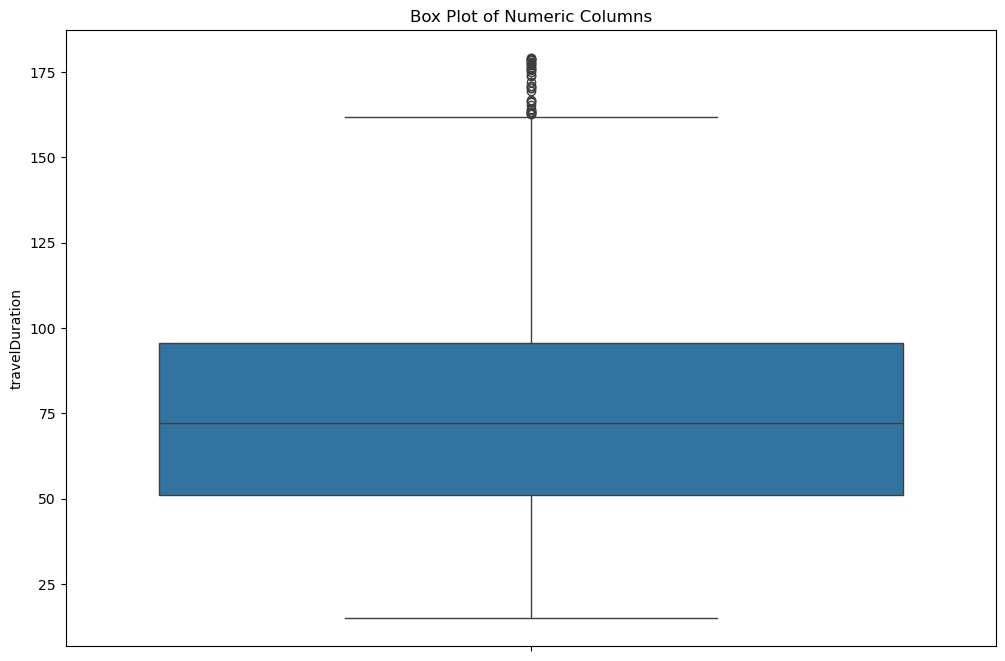

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['travelDuration'])
plt.title('Box Plot of Numeric Columns')
plt.show()

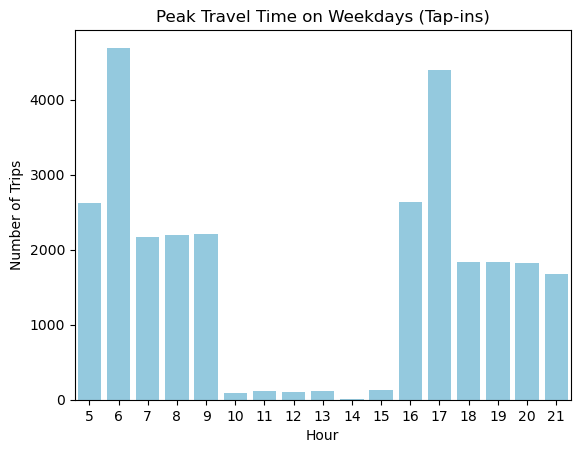

In [22]:
# Define tapGroup function to count trips based on specified column
def tapGroup(data, by: str):
    return data.groupby(by)['transID'].count()

# Filter DataFrame to include only tap-in data and weekdays (Monday to Friday)
df_weekdays_tapin = df[(df['tapInTime'].dt.weekday < 5)]

# Count trips based on tapInHour for weekdays
count_hours_weekdays_tapin = tapGroup(df_weekdays_tapin, 'tapInHour')

# Create a bar plot for peak travel time on weekdays for tap-ins
def peakBar(data):
    sns.barplot(x=data.index, y=data.values, color='skyblue')
    # Set plot title and labels
    plt.title('Peak Travel Time on Weekdays (Tap-ins)')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    # Display the plot
    plt.show()

peakBar(count_hours_weekdays_tapin)




Dalam visualisasi ini, jam sibuk hari kerja adalah jam 06.00, 07.00 dan 17.00, ini disebabkan oleh pola kerja penduduk Jakarta.
Mayoritas penduduk masuk kerja pada jam 6 dan 7 dan jam 17 adalah ahkir masa kerja bagi mayoritas penduduk Jakarta

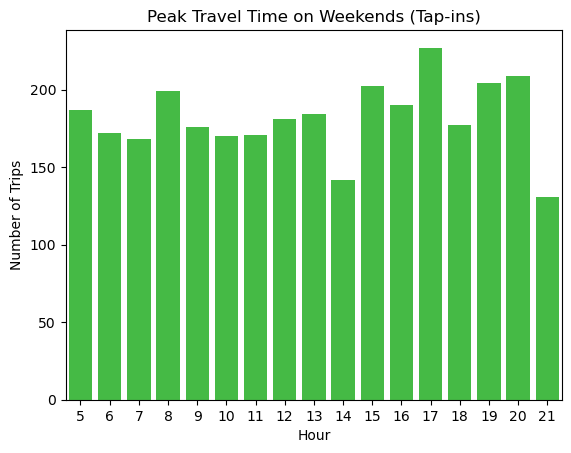

In [24]:
# Filter DataFrame to include only tap-in data and weekends (Saturday and Sunday)
df_weekends_tapin = df[(df['tapInTime'].dt.weekday >= 5)]

# Count trips based on tapInHour for weekends
count_hours_weekends_tapin = tapGroup(df_weekends_tapin, 'tapInHour')

# Create a bar plot for peak travel time on weekends for tap-ins
def peakBar(data):
    sns.barplot(x=data.index, y=data.values, color='limegreen')
    # Set plot title and labels
    plt.title('Peak Travel Time on Weekends (Tap-ins)')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    # Display the plot
    plt.show()

peakBar(count_hours_weekends_tapin)


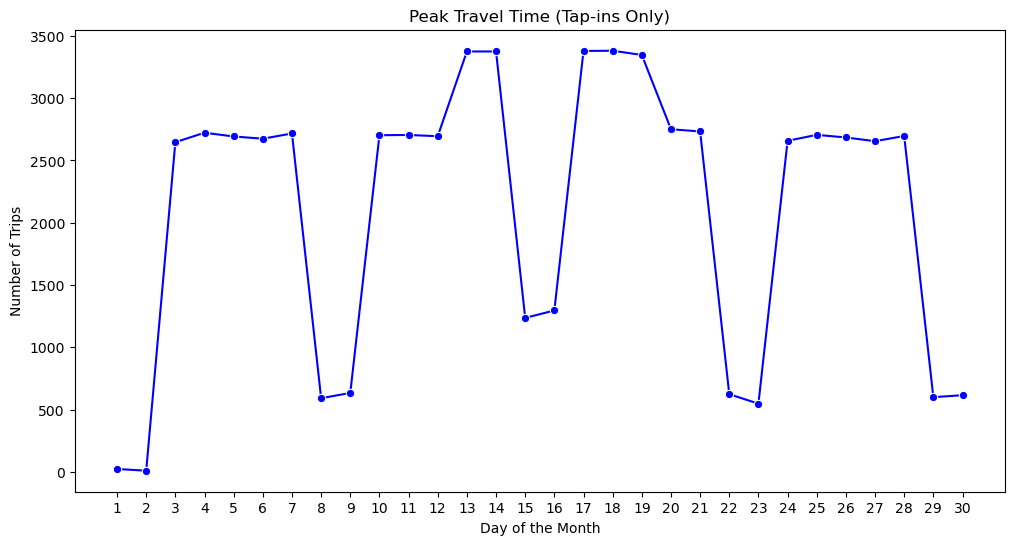

In [25]:
def peakLine(data):
    # Set figure size
    plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
    sns.lineplot(x=data.index, y=data.values, marker='o', color='Blue')
    # Set x-axis ticks to show numbers 1-30
    plt.xticks(range(1, 31))
    # Set plot title and labels
    plt.title('Peak Travel Time (Tap-ins Only)')
    plt.xlabel('Day of the Month')
    plt.ylabel('Number of Trips')
    # Display the plot
    plt.show()

peakLine(count_days)


 Dalam visaulisasi ini, bisa di tentukan bahwa tanggal 12 sampai tanggal 13 adalah tanggal yang paling padat untuk Transjakarta, yaitu hari Sabtu dan Minggu, tanggal ini adalah tanggal yang mengadakan Festival Bedug di Jakarta. 
 Saran saya adalah untuk memperhatikan Festival dan Event yang terjadi di Jakarta untuk mempersiapkan Transjakarta untuk arus penduduk yang besar

In [ ]:
corridor_popularity = df.groupby(['corridorName', 'tapInHour']).size().reset_index(name='tapInCount')

# Grouping by corridorID and summing tapInCount to get total tap-ins per corridor
total_tap_ins_per_corridor = corridor_popularity.groupby('corridorName')['tapInCount'].sum()

# Finding the top 5 most crowded corridors
top5_most_crowded_corridors = total_tap_ins_per_corridor.nlargest(5).reset_index(name='TotalTapIns')

# Merging with corridor_popularity to get tapInCount for each hour
top5_most_crowded_corridors = pd.merge(top5_most_crowded_corridors, corridor_popularity, on='corridorName', how='inner')

# Sorting to get the top 5 most crowded corridors for each hour
top5_most_crowded_corridors = top5_most_crowded_corridors.sort_values(by=['corridorName', 'tapInCount'], ascending=[True, False])

# Creating a DataFrame with unique corridorID values and corresponding tap-in counts
unique_corridorIDs_df = pd.DataFrame({
    'UniqueCorridorName': top5_most_crowded_corridors['corridorName'].unique(),
    'TotalTapIns': total_tap_ins_per_corridor[top5_most_crowded_corridors['corridorName'].unique()].values
})

# Displaying the DataFrame
print("Top 5 most crowded corridors based on tapInTime (unique corridorName):")
print(unique_corridorIDs_df)

Top 5 most crowded corridors based on tapInTime (unique corridorName):
                        UniqueCorridorName  TotalTapIns
0                     Cibubur - Balai Kota          362
1                            Ciputat - CSW          350
2  Harmoni - Jakarta International Stadium          313
3           Kampung Rambutan - Pondok Gede          305
4                      Pulo Gadung - Monas          311


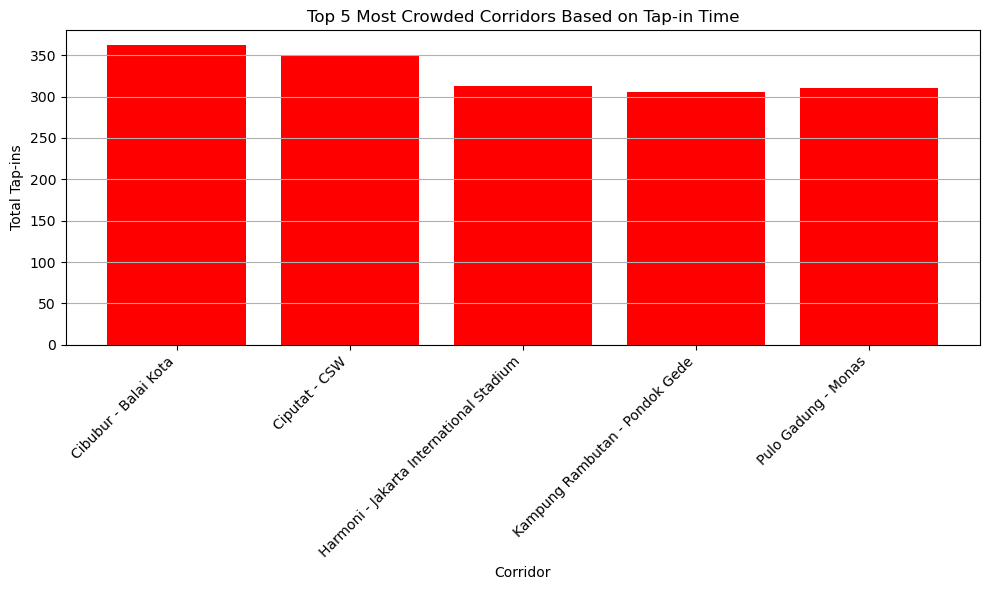

In [ ]:
import matplotlib.pyplot as plt

# Data
corridors = ["Cibubur - Balai Kota", "Ciputat - CSW", "Harmoni - Jakarta International Stadium", "Kampung Rambutan - Pondok Gede", "Pulo Gadung - Monas"]
tap_ins = [362, 350, 313, 305, 311]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(corridors, tap_ins, color='Red')
plt.title('Top 5 Most Crowded Corridors Based on Tap-in Time')
plt.xlabel('Corridor')
plt.ylabel('Total Tap-ins')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()



In [ ]:
df['weekday'] = df['tapInTime'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
df['weekend'] = df['tapInTime'].dt.day_name().isin(['Saturday', 'Sunday'])
df_weekday=df[df['weekday']==True]
df_weekends=df[df['weekday']==False]
df_weekends

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInHour,TapOutHour,TapInWeekdays,travelDuration,Number of Trips,Hour,tapInDay,tapOutDay,weekday,weekend
32000,TLQN677B2R72GC,6539040209758344,dki,"Puti Febi Sitorus, M.TI.",M,1999,D32,Cinere - Bundaran Senayan,0.0,B02414P,...,8,9,6,29.850000,NaN,NaN,9,9,False,True
32001,JIKO719N7T59IC,3555797726624178,dki,Jelita Suwarno,M,1995,JAK.19,Pinang Ranti - Kampung Rambutan,1.0,B02765P,...,11,11,6,23.250000,NaN,NaN,9,9,False,True
32003,USYZ299J0F00CJ,3598871005576489,dki,"R.M. Rizki Utama, S.IP",F,2007,JAK.13,Tanah Abang - Jembatan Lima,0.0,B01014P,...,9,10,6,89.133333,NaN,NaN,9,9,False,True
32004,EFVF578E0R24WU,4580278479854954,dki,Luluh Astuti,M,1992,1A,Pantai Maju - Balai Kota,1.0,B00917P,...,6,6,5,40.900000,NaN,NaN,8,8,False,True
32005,TSQB841Z4W67TC,3543155487538258,dki,Novi Nuraini,M,1973,10,Tanjung Priok - PGC 2,0.0,P00162,...,21,23,5,108.900000,NaN,NaN,8,8,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37880,YFWU560Y3E30LM,4571332363310689,dki,Dr. Vanesa Hariyah,M,2011,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,...,17,19,6,103.950000,NaN,NaN,16,16,False,True
37884,IISY649O9I46XA,6556778552086817,dki,Kurnia Mulyani,F,1986,3A,Rusun Pesakih - Kalideres,1.0,B06656P,...,13,16,6,146.083333,NaN,NaN,23,23,False,True
37886,IFPF807G7R92DX,213160779285738,emoney,"R. Putri Kusumo, S.E.I",F,1997,1A,Pantai Maju - Balai Kota,0.0,B06040P,...,15,17,6,119.233333,NaN,NaN,9,9,False,True
37890,GFLN726N6E23SR,213142775112736,emoney,Nadine Waluyo,F,1997,JAK.30,Grogol - Meruya via Roxy,0.0,B00018P,...,14,15,6,23.833333,NaN,NaN,30,30,False,True


In [ ]:
x=pd.DataFrame(df_weekday.groupby(['tapInStopsName','tapOutStopsName'])['tapInStopsName'].count())
x

tapInStopsName
tapInStopsName                tapOutStopsName                             
18 Office Park                Gg. Puskesmas Kebagusan Raya              17
ACE Hardware                  Term. Depok Baru                           3
ASEAN                         Kejaksaan Agung                           20
Adam Malik                    JORR                                       5
                              Kebayoran Lama                             1
...                                                                    ...
Yayasan Al Kholidin           Kantor Walikota Jaksel                    18
Yayasan Muhammadiyah 1        Sbr. Pam Jaya DKI                         20
Yayasan Muhammadiyah 2        Pospol Jati Bunder                        17
                              Rusun Tanah Abang 2                       18
Yon Arhanud - 10 Pesanggrahan Jln. Manunggal II Petukangan              16

[1971 rows x 1 columns]

In [ ]:
x.columns=['count']
x.sort_values(by='count',ascending=False).head(5)

,,count
tapInStopsName,tapOutStopsName,
Penjaringan,Rusun Kapuk Muara,102
Rusun Kapuk Muara,Penjaringan,97
Garuda Taman Mini,BKN,90
Tanah Merdeka Arah Timur,Kampung Rambutan,77
Simpang Danau Sunter Utara Barat,Jembatan Item,74


In [ ]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'TapOutHour', 'TapInWeekdays',
       'travelDuration', 'Number of Trips', 'Hour', 'tapInDay', 'tapOutDay',
       'weekday', 'weekend'],
      dtype='object')

In [ ]:
x1=pd.DataFrame(df_weekends.groupby(['tapInStopsName','tapOutStopsName'])['tapInStopsName'].count())
x1

tapInStopsName
tapInStopsName                  tapOutStopsName                     
ACC Simatupang                  Taman Lenteng Agung                1
ACE Hardware                    Term. Depok Baru                   2
AKR Tower                       MNC Studios                        1
ASEAN                           Kejaksaan Agung                    1
ASMI                            Monas                              1
...                                                              ...
Yayasan Muhammadiyah 1          PU Irigasi                         1
                                St. Tebet 3                        1
Yayasan Nurul Ihsan Pulo Gebang Jln. Permata Indah 8               1
Yayasan Perguruan Rakyat 2      STIE Trianandra                    1
Yos Sudarso Kodamar             Pemuda Pramuka                     1

[2589 rows x 1 columns]

In [ ]:
x1.columns=['count']
x1.sort_values(by='count',ascending=False).head(5)

,,count
tapInStopsName,tapOutStopsName,
Buperta Cibubur,Cibubur Junction,12
Rusun Kapuk Muara,Penjaringan,11
Penjaringan,Rusun Penjaringan,6
Walikota Jakarta Timur 1,Rusun Rawa Bebek,6
Manggala Wanabakti,St. Palmerah,6


In [ ]:
stop_names = ["Penjaringan", "Rusun Kapuk Muara", "Garuda Taman Mini", "Tanah Merdeka Arah Timur", "Simpang Danau Sunter Utara Barat"]

# Iterate through each stop name
for stop_name in stop_names:
    # Filter the DataFrame for rows where 'tapInStopsName' is equal to the current stop name
    stop_data = df[df['tapInStopsName'] == stop_name]
    
    # Extract the latitude and longitude of the current stop
    stop_lat = stop_data['tapInStopsLat'].iloc[0]
    stop_lon = stop_data['tapInStopsLon'].iloc[0]
    
    # Print the latitude and longitude of the current stop
    print(f"Latitude of {stop_name}: {stop_lat}, Longitude of {stop_name}: {stop_lon}")
    

Latitude of Penjaringan: -6.126306, Longitude of Penjaringan: 106.79203
Latitude of Rusun Kapuk Muara: -6.135667, Longitude of Rusun Kapuk Muara: 106.76299
Latitude of Garuda Taman Mini: -6.290154, Longitude of Garuda Taman Mini: 106.88116
Latitude of Tanah Merdeka Arah Timur: -6.307866, Longitude of Tanah Merdeka Arah Timur: 106.87389
Latitude of Simpang Danau Sunter Utara Barat: -6.139853, Longitude of Simpang Danau Sunter Utara Barat: 106.85663


In [ ]:
# List of stop names
stop_names = ["Buperta Cibubur", "Rusun Kapuk Muara", "Penjaringan", "Walikota Jakarta Timur 1", "Manggala Wanabakti"]

# Iterate through each stop name
for stop_name in stop_names:
    # Filter the DataFrame for rows where 'tapInStopsName' is equal to the current stop name
    stop_data = df[df['tapInStopsName'] == stop_name]
    
    # Extract the latitude and longitude of the current stop
    stop_lat = stop_data['tapInStopsLat'].iloc[0]
    stop_lon = stop_data['tapInStopsLon'].iloc[0]
    
    # Print the latitude and longitude of the current stop
    print(f"Latitude of {stop_name}: {stop_lat}, Longitude of {stop_name}: {stop_lon}")


Latitude of Buperta Cibubur: -6.370321, Longitude of Buperta Cibubur: 106.89628
Latitude of Rusun Kapuk Muara: -6.135667, Longitude of Rusun Kapuk Muara: 106.76299
Latitude of Penjaringan: -6.126306, Longitude of Penjaringan: 106.79203
Latitude of Walikota Jakarta Timur 1: -6.212327, Longitude of Walikota Jakarta Timur 1: 106.94515
Latitude of Manggala Wanabakti: -6.204951, Longitude of Manggala Wanabakti: 106.79963


In [ ]:
import pandas as pd
import folium

# Create DataFrame with provided data
data = {
    'tapInStopsName': ["Penjaringan", "Rusun Kapuk Muara", "Garuda Taman Mini", "Tanah Merdeka Arah Timur", "Simpang Danau Sunter Utara Barat"],
    'tapInStopsLat': [-6.126306, -6.155667, -6.290154, -6.307886, -6.139853],
    'tapInStopsLon': [106.79203, 106.76299, 106.88116, 106.87389, 106.85663]
}

df1 = pd.DataFrame(data)

# Create a map centered around the mean of coordinates
map = folium.Map(location=[df1['tapInStopsLat'].mean(), df1['tapInStopsLon'].mean()], zoom_start=11)

# Add markers for each stop
for index, row in df1.iterrows():
    folium.Marker([row['tapInStopsLat'], row['tapInStopsLon']], popup=row['tapInStopsName']).add_to(map)


coordinates = {
    'Penjaringan': (-6.126306, 106.79203),
    'Rusun Kapuk Muara ': ( -6.155667, 106.76299),
    'Garuda Taman Mini': (-6.290154, 106.88116),
    'Tanah Merdeka Arah Timur ': (-6.307886, 106.87389),
    'Simpang Danau Sunter Utara Barat': ( -6.139853, 106.85663)
}


for area, coord in coordinates.items():
    label_area = f"<b><span style='color: black; text-shadow: 0px 0px 8px black;'>{area}</span></b>"
    folium.Marker(location=coord, icon=folium.DivIcon(html=label_area)).add_to(map)


# Display the map
map


In [ ]:
import pandas as pd
import folium

# Create DataFrame with provided data
data = {
    'tapInStopsName': ["Buperta Cibubur", "Rusun Kapuk Muara", "Penjaringan", "Walikota Jakarta Timur", "Manggala Wanabakti"],
    'tapInStopsLat': [-6.370321, -6.135667, -6.126306, -6.212327, -6.204951],
    'tapInStopsLon': [106.79203, 106.76299, 106.79203, 106.94515, 106.79963]
}

df1 = pd.DataFrame(data)

# Create a map centered around the mean of coordinates
map = folium.Map(location=[df1['tapInStopsLat'].mean(), df1['tapInStopsLon'].mean()], zoom_start=11)

# Add markers for each stop
for index, row in df1.iterrows():
    folium.Marker([row['tapInStopsLat'], row['tapInStopsLon']], popup=row['tapInStopsName']).add_to(map)


coordinates = {
    'Buperta Cibubur': (-6.370321, 106.79203),
    'Rusun Kapuk Muara ': ( -6.155667, 106.76299),
    'Penjaringan': (-6.126306, 106.79203),
    'Walikota Jakarta Timur ': ( -6.212327, 106.94515),
    'Manggala Wanabakti': ( -6.204951, 106.79963)
}


for area, coord in coordinates.items():
    label_area = f"<b><span style='color: black; text-shadow: 0px 0px 8px blue;'>{area}</span></b>"
    folium.Marker(location=coord, icon=folium.DivIcon(html=label_area)).add_to(map)
# Display the map
map

# Kesimpulan

* Jam yang paling padat pada hari kerja adalah pada jam 6 pagi, jam 7 pagi, dan jam 4 sore. Hal ini dapat dimengerti karena pukul 06.00 dan 07.00 merupakan waktu standar warga Jakarta untuk berangkat kerja, sedangkan pukul 16.00 merupakan waktu rata-rata warga Jakarta untuk pulang kerja.

* Jam yang paling padat pada hari libur adalah pada jam 9 malem, jam 7 malem dan jam 1 siang. Tetapi bisa dilihat bawha pengguna Transjakarta berkurang secara drastic dibandingkan hari kerja, karena rata-rata "number of trips" hanya 151 pada hari libur, dibandingkan dengan hari kerja yaitu mempunyai rata-rata 2864 "number of trips" pada hari kerja 

* Tanggal 12 sampai tanggal 13 adalah tanggal yang paling padat untuk Transjakarta, yaitu hari Sabtu dan Minggu, tanggal ini adalah tanggal yang mengadakan Festival Bedug di Jakarta. 
 

* Corridor-corridor yang paling ramai dan padat di Transjakarta adalah  Cibubur - Balai Kota ,  Ciputat - CSW ,  Harmoni - Jakarta International Stadium ,  Kampung Rambutan - Pondok Gede dan Pulo Gadung - Monas 

* Halte-halte yang paling ramai dan padat pada hari kerja adalah   Penjaringan  ,   Rusun Kapuk Muara  ,   Garuda Taman Mini  ,   Tanah Merdeka Arah Timur  dan Simpang Danau Sunter Utara Barat  '

* Halter-Halte yang paling ramai dan padat pada hari libur adalah   Buperta Cibubur  ,   Rusun Kapuk Muara  ,   Penjaringan  ,   Walikota Jakarta Timur dan   Manggala Wanabakti


# Saran

* Menambahkan armada Bis lebih banyak pada waktu terpadat pada hari kerja.

* Mengurangi armada Bis pada waktu Libur

* Perhatikan acara-acara dan festival untuk menambah armada bus di waktu-waktu penting

* Menambahkan petugas untuk  mefasilitasi koridor yang paling ramai

* Menaikan tingkat kualitas halte-halte yang paling padat seperti menaikan jumlah kursi dan menaikan tingkat kebersihan di halte-halte tersebut

